In [1]:
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Read spatial architecture results from NMF on Cell2location estimates

In [3]:
nmf = read.csv('../../../../revision_cancer_cell/cell2loc_NMF/NMF_results/fct_5/location_factors_mean/n_fact5.csv',row.names = 1)
nmf$Assigned = gsub(pattern = 'mean_nUMI_factors',replacement = '',x = colnames(nmf)[max.col(nmf)])
nmf

,mean_nUMI_factorsfact_0,mean_nUMI_factorsfact_1,mean_nUMI_factorsfact_2,mean_nUMI_factorsfact_3,mean_nUMI_factorsfact_4,Assigned
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
P0_OC_2_100_8950,0.34223151,0.003246243,0.200437302,0.17913468,0.9164119,fact_4
P0_OC_2_150_3750,0.25433340,0.187063577,0.331097384,0.42491188,0.3409679,fact_3
P0_OC_2_150_7000,0.22044746,0.008721938,0.102106472,0.33244077,0.1374715,fact_3
P0_OC_2_150_7300,0.09309841,0.092521374,0.275927102,0.77659559,0.2539494,fact_3
P0_OC_2_200_4950,0.37309685,0.104763034,0.401616436,0.39546111,0.3866637,fact_2
P0_OC_2_200_6100,0.36884401,0.080783144,0.181678670,0.34139622,0.7489793,fact_4
P0_OC_2_200_10350,0.20325177,0.135042793,0.636481532,0.04548490,1.2354934,fact_4
P0_OC_2_200_10550,0.23700382,0.142635837,0.224925216,0.11892563,0.3988419,fact_4
P0_OC_2_250_8000,0.15878396,0.292910045,0.284705573,0.33067861,0.2423129,fact_3


# Plot posterior probability across spatial regions defined by NMF

In [4]:
plot_probability = function(patient){
    posterior = data.table::fread(paste0('./posterior_probability/',patient,'.csv'))
    posterior = posterior %>% left_join(nmf %>% rownames_to_column('V1'))
    posterior$Assigned = ifelse(posterior$Site=='FT','FT',posterior$Assigned)
    posterior = posterior %>% filter(!is.na(Assigned))

    print(posterior %>% group_by(Assigned) %>% summarise(quantile(prob_clone1)))

    pdf(paste0('./posterior_probability/',patient,'_nmf.pdf'))
    a = ggplot(posterior, aes(x = Assigned, y = prob_clone1, fill = Assigned)) +
      # geom_violin(trim = FALSE, alpha = 0.7) +
      geom_boxplot(width = 0.15, outlier.shape = NA, alpha = 0.9, color = "black") +
      labs(
        title = patient,
        x = "Assigned Clone",
        y = "Probability of Clone 1"
      ) +
      theme_classic(base_size = 6) +
      theme(
        legend.position = "none",
        axis.text.x = element_text(angle = 45, vjust = 0.8, hjust = 0.9)
      )+
    scale_y_continuous(limits = c(0, 1))
    print(a)
    dev.off()

    return(a)
}

In [5]:
plots = purrr::map(.x = c('OV006'),.f = plot_probability)

Joining with `by = join_by(V1)`
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'Assigned'. You can override using the
`.groups` argument.


# A tibble: 25 × 2
# Groups:   Assigned [5]
   Assigned `quantile(prob_clone1)`
   <chr>                      <dbl>
 1 fact_0               0.000000159
 2 fact_0               0.149      
 3 fact_0               0.559      
 4 fact_0               0.876      
 5 fact_0               0.999      
 6 fact_1               0.0000259  
 7 fact_1               0.236      
 8 fact_1               0.658      
 9 fact_1               0.916      
10 fact_1               0.999      
# ℹ 15 more rows


In [6]:
library(patchwork)

pdf('posterior_probability/posterior_all_patient_across_nmf.pdf')
wrap_plots(plots, ncol = 3)
dev.off()

png 
  2

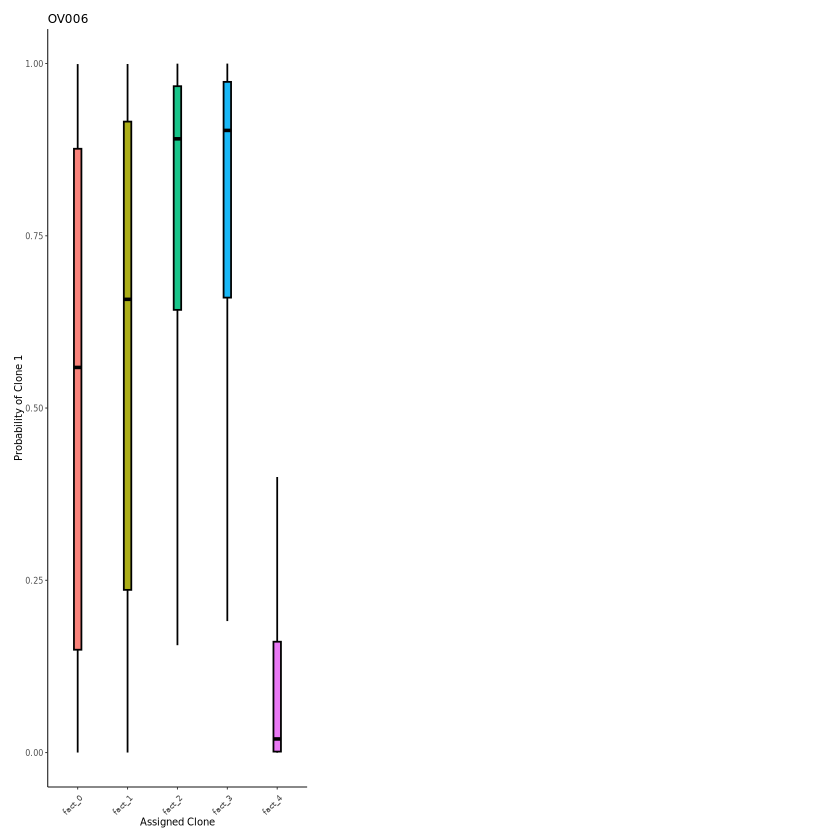

In [7]:
wrap_plots(plots, ncol = 3)

In [8]:
plot_probability = function(patient){
    posterior = data.table::fread(paste0('./posterior_probability/',patient,'.csv'))
    posterior = posterior %>% left_join(nmf %>% rownames_to_column('V1'))
    posterior$Assigned = ifelse(posterior$Site=='FT','FT',posterior$Assigned)
    posterior = posterior %>% filter(!is.na(Assigned))

    return(posterior %>% group_by(Assigned) %>% summarise(quantile(prob_clone1)))
}

In [9]:
df = purrr::map_dfr(.x = c('OV006'),.f = plot_probability)
df

Joining with `by = join_by(V1)`
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'Assigned'. You can override using the
`.groups` argument.


Assigned,quantile(prob_clone1)
<chr>,<dbl>
fact_0,1.592970e-07
fact_0,1.492460e-01
fact_0,5.589517e-01
fact_0,8.763224e-01
fact_0,9.992727e-01
fact_1,2.592645e-05
fact_1,2.361179e-01
fact_1,6.577830e-01
fact_1,9.157396e-01


In [10]:
df[seq(from = 3,to = nrow(df),by = 5),]

Assigned,quantile(prob_clone1)
<chr>,<dbl>
fact_0,0.55895172
fact_1,0.65778305
fact_2,0.89075625
fact_3,0.90295181
fact_4,0.01975858
